In [68]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# Raw Measures

# Values

In [69]:
pokemon_df = pd.read_csv('/Datasets/Pokemon.csv', encoding='utf-8',sep =',')
pokemon_df.head()
pokemon_df[['HP', 'Attack','Defense']].describe()

,HP,Attack,Defense
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500
std,25.534669,32.457366,31.183501
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


# Counts

In [70]:
popsong_df = pd.read_csv('/Datasets/song_views.csv', encoding='utf-8',sep =',')
popsong_df.head()

,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0


# Binarization 

In [71]:
watched = np.array(popsong_df['listen_count'])
watched[watched >= 1] = 1
popsong_df['watched'] = watched
popsong_df.head(10)
#popsong_df['watched'][:8]

,user_id,song_id,title,listen_count,watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0


In [72]:
from sklearn.preprocessing import Binarizer

bn = Binarizer(threshold=0.9)
pd_watched = bn.transform([popsong_df['listen_count']])[0]
#print(pd_watched)
popsong_df['pd_watched'] = pd_watched
popsong_df.head(11)

,user_id,song_id,title,listen_count,watched,pd_watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0,0


# Rounding

In [73]:
items_popularity = pd.read_csv('Datasets/item_popularity.csv', encoding='utf-8')
items_popularity['popularity_scale_10'] = np.array(np.round((items_popularity['pop_percent'] *10)), dtype='int')
items_popularity['popularity_scale_101'] = np.array(np.round((items_popularity['pop_percent'] *100)), dtype='int')
items_popularity

,item_id,pop_percent,popularity_scale_10,popularity_scale_101
0,it_01345,0.98324,10,98
1,it_03431,0.56123,6,56
2,it_04572,0.12098,1,12
3,it_98021,0.35476,4,35
4,it_01298,0.92101,9,92
5,it_90120,0.81212,8,81
6,it_10123,0.56502,6,57


# Interations

In [77]:
attack_defense = pokemon_df[['Attack', 'Defense']]
attack_defense.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [ ]:
"""
This example, I think we should read about 
1/ Coefficient of Variation – CV.
2/ Polynomial regression. To understand Poloynomial regression,
we have to study Linear Regression.
"""

In [95]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, interaction_only = False, include_bias = False)
result = pf.fit_transform(attack_defense)
result[:6]

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       [  100.,   123., 10000., 12300., 15129.],
       [   52.,    43.,  2704.,  2236.,  1849.],
       [   64.,    58.,  4096.,  3712.,  3364.]])

In [97]:
pd.DataFrame(pf.powers_, columns=['Attack_degree', 'Defense_degree'])
# Now, I don't really understand 

,Attack_degree,Defense_degree
0,1,0
1,0,1
2,2,0
3,1,1
4,0,2


In [101]:
intr_features = pd.DataFrame(result, columns=['Attack', 'Defense',  
                                           'Attack^2', 
                                           'Attack x Defense',  
                                           'Defense^2'])
intr_features.head(5)

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,100.0,123.0,10000.0,12300.0,15129.0
4,52.0,43.0,2704.0,2236.0,1849.0


# Binning

In [116]:
freecodecamp_survey_df = pd.read_csv('Datasets/fcc_2016_coder_survey_subset.csv', encoding = 'utf-8')
freecodecamp_survey_df.head()


,ID.x,Age,ChildrenNumber,CountryCitizen,EmploymentField,EmploymentStatus,ExpectedEarning,Gender,Income,JobPref,JobRoleInterest,LanguageAtHome,MaritalStatus,SchoolDegree,StudentDebtOwe
0,cef35615d61b202f1dc794ef2746df14,28.0,NaN,United States of America,office and administrative support,Employed for wages,NaN,male,32000.0,freelance,NaN,English,married or domestic partnership,"some college credit, no degree",20000.0
1,323e5a113644d18185c743c241407754,22.0,NaN,United States of America,food and beverage,Employed for wages,50000.0,male,15000.0,work for a startup,Front-End Web Developer,English,NaN,"some college credit, no degree",NaN
2,b29a1027e5cd062e654a63764157461d,19.0,NaN,United States of America,finance,Employed for wages,NaN,male,48000.0,start your own business,NaN,English,NaN,high school diploma or equivalent (GED),NaN
3,04a11e4bcb573a1261eb0d9948d32637,26.0,NaN,United States of America,"arts, entertainment, sports, or media",Employed for wages,65000.0,female,43000.0,work for a startup,Front-End Web Developer,English,NaN,bachelor's degree,7000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,NaN,United States of America,education,Employed for wages,45000.0,female,6000.0,work for a medium-sized company,Full-Stack Web Developer,Khmer,NaN,"some college credit, no degree",NaN


Text(0, 0.5, 'Frequency')

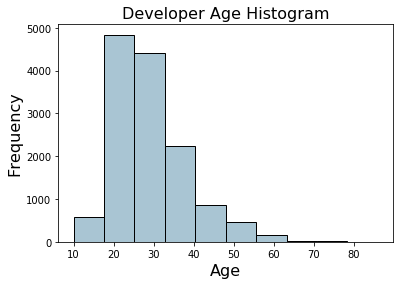

In [114]:
fig, ax = plt.subplots()
freecodecamp_survey_df['Age'].hist(color='#A9C5D3', edgecolor='black',  
                          grid=False)
ax.set_title('Developer Age Histogram', fontsize=16)
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)

# Fixed-Width Binning